Loading the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


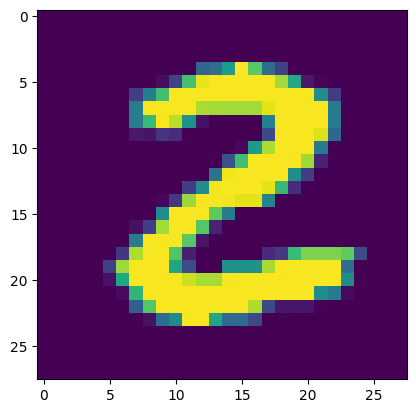

2


In [8]:
plt.imshow(X_train[25])
plt.show()

print(Y_train[25])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
X_train = X_train/255

In [12]:
X_test = X_test/255

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [16]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2853 - accuracy: 0.9179
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1398 - accuracy: 0.9581
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1046 - accuracy: 0.9679
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0847 - accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0708 - accuracy: 0.9776
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0612 - accuracy: 0.9811
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9826
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9852
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9860
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.036

Accuracy on Test data

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1323 - accuracy: 0.9743


In [18]:
print(X_test.shape)

(10000, 28, 28)


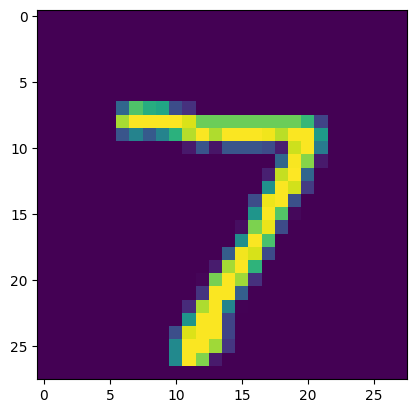

In [19]:
plt.imshow(X_test[0])
plt.show()

In [20]:
print(Y_test[0])

7


In [21]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 880us/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[0])

[2.7334240e-01 4.1233823e-05 2.0442618e-01 9.8615366e-01 1.5299236e-07
 2.7583605e-05 2.2801520e-14 1.0000000e+00 4.7713285e-03 9.7523636e-01]


Converting the prediction probabilities to class labels

In [24]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [25]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    1    1    0    1    2    2    3]
 [   1 1123    0    4    0    0    3    0    3    1]
 [   4    6  995    5    3    1    3    3   10    2]
 [   0    3    5  984    2    3    0    2    5    6]
 [   1    2    1    1  947    0   10    3    1   16]
 [   3    0    0   16    1  854   10    3    4    1]
 [  11    2    2    0    5    1  936    0    1    0]
 [   2    4   12    3    1    0    0  999    2    5]
 [   5    0    2    4    2    3    5    3  944    6]
 [   2    2    0   10   10    5    0    6    3  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

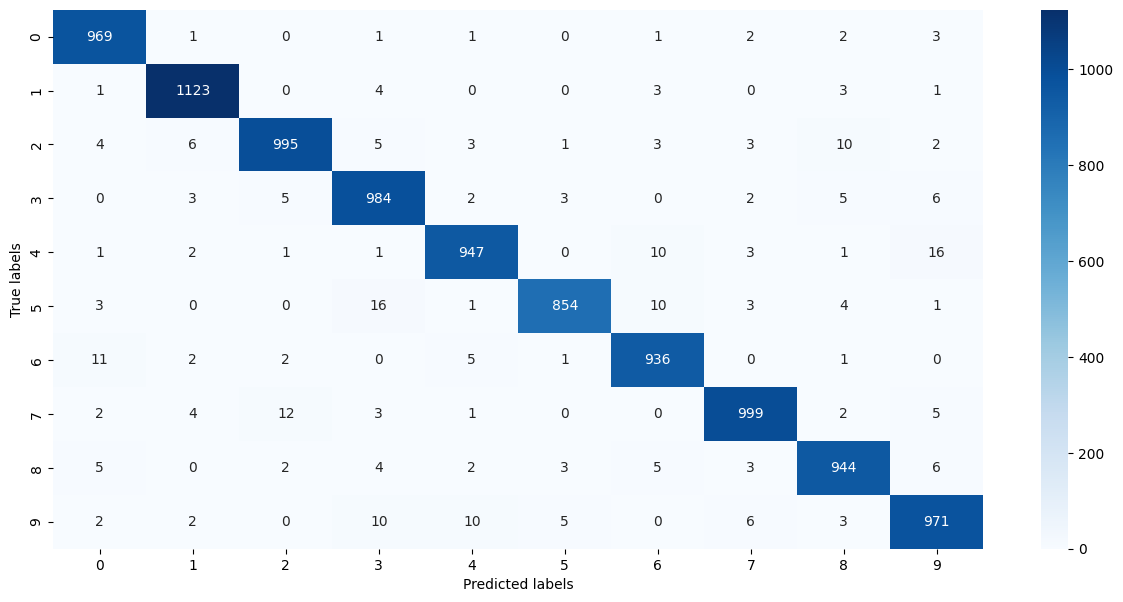

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

Building a Predictive System

In [29]:
input_image_path = "../test_image.png"

input_image = cv2.imread(input_image_path)

In [30]:
type(input_image)

numpy.ndarray

In [31]:
print(input_image)

[[[243 243 243]
  [243 243 243]
  [243 243 243]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[ 44  31  41]
  [ 46  31  42]
  [ 46  31  42]
  ...
  [ 48  33  44]
  [ 48  33  44]
  [ 48  33  44]]

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]

 ...

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]

 [[ 71   1  57]
  [ 84   1  68]
  [ 84   1  68]
  ...
  [ 84   1  68]
  [ 84   1  68]
  [ 84   1  68]]]


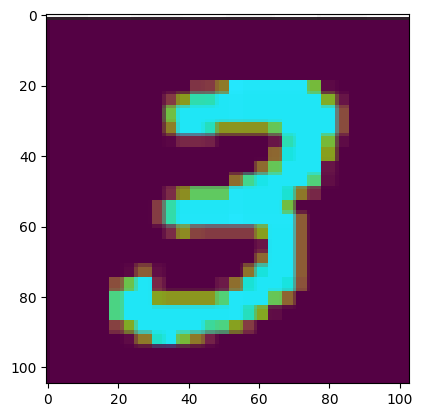

In [32]:
plt.imshow(input_image)
plt.show()

In [33]:
input_image.shape

(105, 103, 3)

In [34]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(105, 103)

In [36]:
input_img_resized = cv2.resize(grayscale, (28, 28))

In [37]:
print(input_img_resized.shape)

(28, 28)


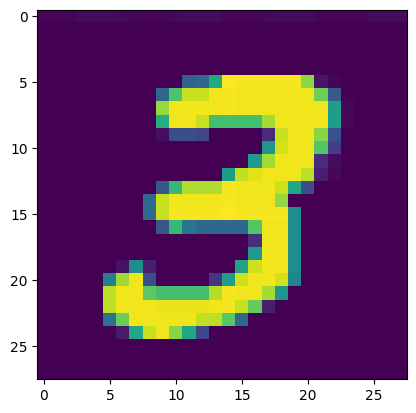

In [38]:
plt.imshow(input_img_resized)
plt.show()

In [39]:
input_img_resized = input_img_resized/255

In [40]:
image_reshaped = np.reshape(input_img_resized, [1, 28, 28])

In [41]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 35ms/step
[[1.0842039e-04 3.7640656e-04 7.2361439e-01 9.9999988e-01 5.6705241e-14
  1.4551584e-01 6.5491698e-13 1.8029930e-02 4.6505440e-07 6.9931082e-02]]


In [42]:
input_pred_label = np.argmax(input_pred)

In [43]:
print(input_pred_label)

3


In [45]:
import pickle

with open("../model.pkl", "wb") as f:
    pickle.dump(model, f)